## Model Training

Here is the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:
- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)


### Importing the libraries

In [27]:
import os #Operating System and File Operations
import pandas as pd #Dataframe
import matplotlib.pyplot as plt #Plotting Graphs
import librosa #Audio Processing
import librosa.display #Displaying Audio processing
import numpy as np #Mathematical Operations
import IPython.display as ipd  # To play sound in the notebook

### RAVDESS

In [15]:
RAV = "./RAVDESS/Combined/"
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    part = i.split('.')[0].split('-')
    emotion.append(int(part[2]))
    temp = int(part[6])
    if temp%2 == 0:
        temp = "female"
    else:
        temp = "male"
    gender.append(temp)
    path.append(RAV + i )

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

labels
male_neutral       144
female_neutral     144
male_happy          96
female_happy        96
male_sad            96
female_sad          96
male_angry          96
female_angry        96
male_fear           96
female_fear         96
male_disgust        96
female_disgust      96
male_surprise       96
female_surprise     96
Name: count, dtype: int64

### CREMA-D

In [16]:
CREMA = "./CREMA-D/"
dir_list = os.listdir(CREMA)
dir_list.sort()

gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

labels
male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_sad        600
female_happy      600
male_neutral      575
female_neutral    512
Name: count, dtype: int64

### TESS

In [17]:
TESS = "./TESS/"
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [18]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

labels
female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: count, dtype: int64

### Concatination of all Dataframes

In [19]:
df = pd.concat([RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

labels
female_sad         1096
female_happy       1096
female_fear        1096
female_disgust     1096
female_angry       1096
female_neutral     1056
male_fear           767
male_sad            767
male_happy          767
male_angry          767
male_disgust        767
male_neutral        719
female_surprise     496
male_surprise        96
Name: count, dtype: int64


In [20]:
print(df)

              labels   source                                         path
0       male_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-01.wav
1     female_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-02.wav
2       male_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-03.wav
3     female_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-04.wav
4       male_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-05.wav
...              ...      ...                                          ...
7437  female_disgust    CREMA                ./CREMA-D/1091_WSI_DIS_XX.wav
7438     female_fear    CREMA                ./CREMA-D/1091_WSI_FEA_XX.wav
7439    female_happy    CREMA                ./CREMA-D/1091_WSI_HAP_XX.wav
7440  female_neutral    CREMA                ./CREMA-D/1091_WSI_NEU_XX.wav
7441      female_sad    CREMA                ./CREMA-D/1091_WSI_SAD_XX.wav

[11682 rows x 3 columns]


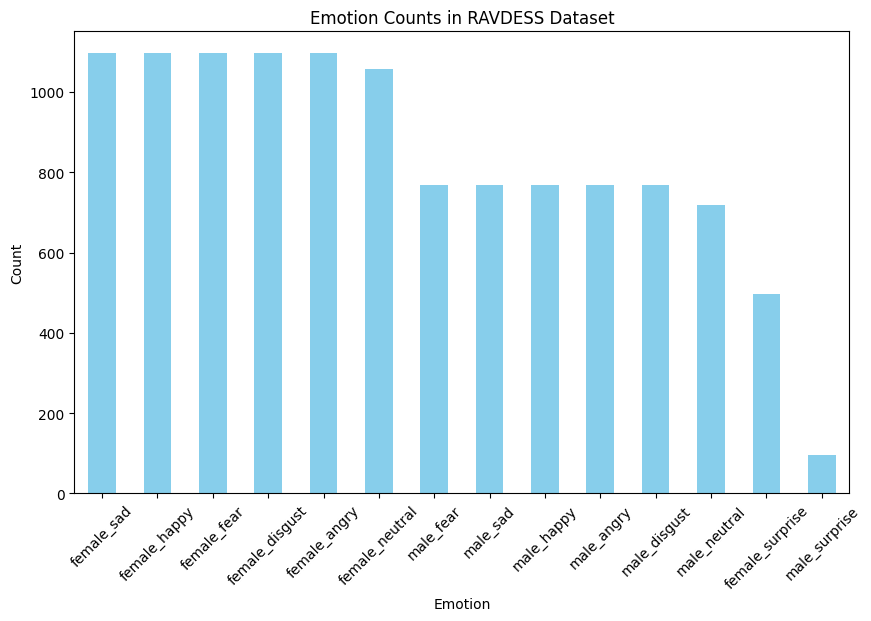

In [21]:
# Count the occurrences of each label
emotion_counts = df['labels'].value_counts()

# Plot the bar graph
emotion_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Emotion Counts in RAVDESS Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

We can see that the count of male_neutral and female_neutral is 144 each and happy ones are of 96 each.
Our main focus is on scoring positive when its neutral or positive. The score of other emotions such as sad, disgust, surprise will have a positive score but less value compared to positive and neutral ones.

The remaining one: anger and fear are to be considered negative.

Next Steps:
- Importing Librosa for spectrogram and wave: Done
- Audio Wave
- LOG MEL SPECTROGRAM
- Data Augmentation (Mainly adding noise and pitch to the dataset will be the main changes) (important)
- Feature Extraction
- Saving the features
- Data Preparation from the extracted features
- Choosing the appropiate model(will apply on 2-3 models)
- Checking their accuracy, precision and F-1 Score (accuracy target: > 60%)
- Final judgement for the model
- Saving and loading the standard model
- Audio segmentation and applying the model
- exporting visuals and tabluar data for the audio
- Creating a scoring model for the same

Waveplots - Waveplots let us know the loudness of the audio at a given time.
Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

<Figure size 1000x500 with 0 Axes>

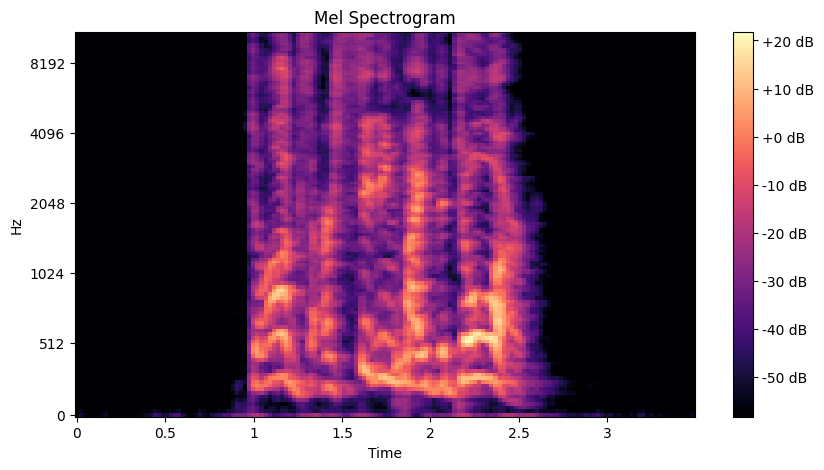

In [31]:
# CREATE LOG MEL SPECTROGRAM

plt.figure(figsize=(10, 5))
# Load an example audio file
audio_file = df['path'].iloc[1020]
data, sr = librosa.load(audio_file)

# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


In [32]:
import librosa
import numpy as np
import pandas as pd
import os

def extract_features_from_csv(csv_path, output_dir="total_features/"):
    if not os.path.exists(csv_path):
        print(f"Error: CSV file '{csv_path}' not found.")
        return

    os.makedirs(output_dir, exist_ok=True)

    data = pd.read_csv(csv_path)

    # Create empty dataframes for each feature
    mfcc_df = pd.DataFrame()
    chroma_df = pd.DataFrame()
    mel_spec_df = pd.DataFrame()
    contrast_df = pd.DataFrame()
    tonnetz_df = pd.DataFrame()
    zcr_df = pd.DataFrame()
    rmse_df = pd.DataFrame()

    for idx, row in data.iterrows():
        audio_file = row['path']
        emotion = row['labels']

        if not os.path.exists(audio_file):
            print(f"Warning: Audio file '{audio_file}' not found. Skipping...")
            continue

        try:
            audio, sr = librosa.load(audio_file, sr=None)
            print(f"Loaded audio file '{audio_file}' with sample rate {sr}.")

            # Feature 1: MFCCs
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            mfcc_mean = np.mean(mfcc, axis=1)
            mfcc_df = pd.concat([mfcc_df, pd.DataFrame([mfcc_mean], columns=[f"mfcc_{i+1}" for i in range(13)])], ignore_index=True)

            # Feature 2: Chroma
            stft = np.abs(librosa.stft(audio))
            chroma = librosa.feature.chroma_stft(S=stft, sr=sr)
            chroma_mean = np.mean(chroma, axis=1)
            chroma_df = pd.concat([chroma_df, pd.DataFrame([chroma_mean], columns=[f"chroma_{i+1}" for i in range(12)])], ignore_index=True)

            # Feature 3: Mel-Spectrogram
            mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
            mel_mean = np.mean(mel_spec, axis=1)
            mel_spec_df = pd.concat([mel_spec_df, pd.DataFrame([mel_mean], columns=[f"mel_{i+1}" for i in range(len(mel_mean))])], ignore_index=True)

            # Feature 4: Spectral Contrast
            contrast = librosa.feature.spectral_contrast(S=stft, sr=sr)
            contrast_mean = np.mean(contrast, axis=1)
            contrast_df = pd.concat([contrast_df, pd.DataFrame([contrast_mean], columns=[f"contrast_{i+1}" for i in range(contrast.shape[0])])], ignore_index=True)

            # Feature 5: Tonnetz
            tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sr)
            tonnetz_mean = np.mean(tonnetz, axis=1)
            tonnetz_df = pd.concat([tonnetz_df, pd.DataFrame([tonnetz_mean], columns=[f"tonnetz_{i+1}" for i in range(tonnetz.shape[0])])], ignore_index=True)

            # Feature 6: Zero Crossing Rate (ZCR)
            zcr = librosa.feature.zero_crossing_rate(audio)
            zcr_mean = np.mean(zcr)
            zcr_df = pd.concat([zcr_df, pd.DataFrame([[zcr_mean]], columns=["zcr_mean"])], ignore_index=True)

            # Feature 7: Root Mean Square Energy (RMSE)
            rmse = librosa.feature.rms(y=audio)
            rmse_mean = np.mean(rmse)
            rmse_df = pd.concat([rmse_df, pd.DataFrame([[rmse_mean]], columns=["rmse_mean"])], ignore_index=True)

        except Exception as e:
            print(f"Error processing '{audio_file}': {e}")

    # Add emotion column to each feature dataframe
    mfcc_df['emotion'] = data['labels']
    chroma_df['emotion'] = data['labels']
    mel_spec_df['emotion'] = data['labels']
    contrast_df['emotion'] = data['labels']
    tonnetz_df['emotion'] = data['labels']
    zcr_df['emotion'] = data['labels']
    rmse_df['emotion'] = data['labels']

    # Save each feature-specific dataframe to a separate CSV
    mfcc_df.to_csv(os.path.join(output_dir, "mfcc_features.csv"), index=False)
    chroma_df.to_csv(os.path.join(output_dir, "chroma_features.csv"), index=False)
    mel_spec_df.to_csv(os.path.join(output_dir, "mel_spectrogram_features.csv"), index=False)
    contrast_df.to_csv(os.path.join(output_dir, "spectral_contrast_features.csv"), index=False)
    tonnetz_df.to_csv(os.path.join(output_dir, "tonnetz_features.csv"), index=False)
    zcr_df.to_csv(os.path.join(output_dir, "zcr_features.csv"), index=False)
    rmse_df.to_csv(os.path.join(output_dir, "rmse_features.csv"), index=False)

    print(f"\nFeature extraction complete! Feature CSVs saved in '{os.path.abspath(output_dir)}' directory.")

csv_path = "Data_path.csv" 
extract_features_from_csv(csv_path)

Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-01.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-02.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-03.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-04.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-05.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-06.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-07.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-08.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-09.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-10.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-11.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Com

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=659
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=645
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_base_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_bath_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=714
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_bean_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_beg_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_bite_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=613
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=635
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=999
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=500
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_boat_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_bone_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_book_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=578
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=530
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=553
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_bought_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_burn_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_cab_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=536
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=555
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=633
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_calm_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_came_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_cause_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=557
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=601
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=647
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=544
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_chain_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_chair_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=644
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=603
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=642
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_chalk_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_chat_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_check_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=554
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=652
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_cheek_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_chief_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=660
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=632
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_choice_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_cool_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_dab_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_date_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_dead_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=571
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=602
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=574
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=556
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=617
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_death_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_deep_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_dime_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=611
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=533
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=688
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_dip_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_ditch_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_dodge_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=701
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=565
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_dog_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_doll_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=639
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=572
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_door_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_fail_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=594
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=605
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_fall_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_far_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=609
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_fat_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_fit_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_five_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_food_fear.wav' with sample rate 96000.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=653
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=568
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_gap_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_gas_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_gaze_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_germ_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=643
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=991
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_get_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_gin_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_goal_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=496
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=597
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=608
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=610
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_good_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_goose_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_gun_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_half_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_hall_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=531
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=698
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_hash_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_hate_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_have_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=570
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=634
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_haze_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_hire_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_hit_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_hole_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_home_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_hurl_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=552
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=596
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=532
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_hush_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_jail_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_jar_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=589
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_join_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_judge_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_jug_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=579
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=543
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=697
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=624
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_juice_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_keen_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_keep_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_keg_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_kick_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=640
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=623
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_kill_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_king_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_kite_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=614
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=558
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_knock_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_late_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_laud_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=588
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=584
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_lean_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_learn_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=649
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_lease_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_lid_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=604
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_life_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_limb_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=559
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=619
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_live_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_loaf_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_long_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_lore_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_lose_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_lot_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=590
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_love_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_luck_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_make_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_match_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=627
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=650
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_merge_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_mess_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_met_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=566
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_mill_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_mob_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=599
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_mode_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_mood_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_moon_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_mop_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=587
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_mouse_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_nag_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=654
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=585
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_name_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_near_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=537
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_neat_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_nice_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=676
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=563
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_note_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_numb_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_pad_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_page_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=663
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_pain_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_pass_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_pearl_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_peg_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=577
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_perch_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_phone_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=595
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_pick_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_pike_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_pole_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=758
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_pool_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_puff_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_rag_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_raid_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_rain_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=616
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=630
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_raise_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_rat_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_reach_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=651
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_read_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_red_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_ring_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=620
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=638
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_ripe_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_road_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_room_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_rose_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_rot_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=600
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_rough_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_rush_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=618
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_said_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_sail_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_search_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=606
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=724
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=661
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_seize_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_sell_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_shack_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_shall_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_shawl_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_sheep_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=719
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_shirt_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_should_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_shout_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=990
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=495
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=626
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=674
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_size_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_soap_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_soup_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_sour_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=684
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=598
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=664
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_south_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_sub_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_such_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_sure_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_take_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=561
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_talk_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_tape_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_team_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_tell_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=629
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_thin_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_third_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_thought_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_thumb_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_time_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_tip_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_tire_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_ton_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=655
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_tool_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_tough_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_turn_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_vine_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=641
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_voice_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_void_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=657
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_vote_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_wag_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_walk_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_wash_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=770
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_week_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_wheat_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=522
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_when_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_which_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_whip_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_white_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_wife_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_wire_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=612
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_witch_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_yearn_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_yes_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=680
  warnings.warn(


Loaded audio file './TESS/OAF_Fear/OAF_young_fear.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Fear/OAF_youth_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=670
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=776
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_back_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_bar_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=738
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=826
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_base_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_bath_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=792
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=691
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_bean_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_beg_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=787
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=712
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_bite_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_boat_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_bone_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_book_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_bought_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_burn_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=681
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=723
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_cab_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_calm_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=852
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_came_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_cause_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=747
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=746
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_chain_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_chair_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=760
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=767
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_chalk_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_chat_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=704
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=825
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_check_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_cheek_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=772
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=823
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_chief_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_choice_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=717
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_cool_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_dab_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_date_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_dead_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_death_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=749
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=710
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=810
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_deep_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_dime_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=693
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=876
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_dip_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_ditch_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=765
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=786
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_dodge_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_dog_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=838
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_doll_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_door_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_fail_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_fall_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=750
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_far_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_fat_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=782
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=757
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_fit_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_five_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=846
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_food_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_gap_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=807
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=756
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_gas_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_gaze_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=917
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=815
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_germ_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_get_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=820
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=740
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_gin_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_goal_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=785
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=741
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_good_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_goose_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=812
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_gun_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_half_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_hall_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_hash_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=806
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=735
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_hate_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_have_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=824
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=814
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_haze_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_hire_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=795
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=699
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_hit_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_hole_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=835
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=707
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_home_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_hurl_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=702
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_hush_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_jail_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=771
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_jar_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_join_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_judge_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_jug_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=880
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_juice_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_keen_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=847
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=736
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_keep_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_keg_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=811
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_kick_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_kill_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=799
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=853
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_king_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_kite_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_knock_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=730
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_late_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_laud_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=682
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=790
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_lean_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_learn_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=789
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=829
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_lease_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_lid_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_life_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_limb_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=854
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=769
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_live_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_loaf_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=784
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_long_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_lore_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_lose_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_lot_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=914
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_love_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_luck_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=841
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_make_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_match_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=793
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_merge_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_mess_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=800
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=844
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_met_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_mill_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_mob_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_mode_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_mood_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_moon_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=816
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_mop_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_mouse_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=803
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=819
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_nag_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_name_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_near_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_neat_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=845
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=797
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_nice_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_note_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=779
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_numb_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_pad_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_page_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_pain_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=818
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_pass_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_pearl_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=877
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_peg_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_perch_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=905
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=743
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_phone_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_pick_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=695
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_pike_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_pole_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_pool_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_puff_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=802
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=763
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_rag_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_raid_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_rain_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_raise_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=732
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_rat_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_reach_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=703
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=833
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_read_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_red_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_ring_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_ripe_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_road_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_room_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=696
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=831
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_rose_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_rot_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=694
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=849
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_rough_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_rush_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_said_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_sail_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=834
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=875
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_search_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_seize_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_sell_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_shack_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=721
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_shall_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_shawl_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=837
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_sheep_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_shirt_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_should_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_shout_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=783
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=801
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_size_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_soap_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=737
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=856
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_soup_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_sour_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_south_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_sub_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_such_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_sure_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=861
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_take_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_talk_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_tape_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_team_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_tell_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_thin_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_third_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_thought_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=762
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=677
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_thumb_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_time_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=830
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_tip_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_tire_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=868
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_ton_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_tool_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_tough_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_turn_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_vine_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_voice_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=754
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_void_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_vote_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=938
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=894
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_wag_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_walk_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=872
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=893
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_wash_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_week_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=711
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_wheat_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_when_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_which_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_whip_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_white_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_wife_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_wire_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_witch_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_yearn_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_yes_ps.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=808
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=706
  warnings.warn(


Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_young_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Pleasant_surprise/OAF_youth_ps.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_back_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_bar_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=978
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=955
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_base_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_bath_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=981
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=986
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_bean_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_beg_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=927
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=925
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_bite_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_boat_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=971
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=941
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_bone_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_book_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=960
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=965
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_bought_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_burn_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_cab_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_calm_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=889
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_came_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_cause_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=950
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=942
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_chain_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_chair_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=972
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=988
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_chalk_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_chat_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=947
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=919
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_check_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_cheek_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=908
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=969
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_chief_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_choice_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_cool_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_dab_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_date_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_dead_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=932
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_death_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_deep_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=949
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=989
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_dime_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_dip_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=928
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=998
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_ditch_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_dodge_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=979
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_dog_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_doll_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=867
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=904
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_door_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_fail_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_fall_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_far_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=945
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1015
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_fat_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_fit_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=892
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_five_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_food_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=921
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_gap_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_gas_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_gaze_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_germ_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=956
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=915
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_get_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_gin_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_goal_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_good_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1004
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=923
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_goose_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_gun_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=957
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=968
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_half_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_hall_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_hash_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_hate_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=900
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=896
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_have_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_haze_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1006
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=973
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_hire_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_hit_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=836
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=994
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_hole_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_home_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=857
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=943
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_hurl_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_hush_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_jail_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_jar_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=959
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_join_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_judge_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1000
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_jug_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_juice_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_keen_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_keep_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=951
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_keg_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_kick_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=940
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=997
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_kill_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_king_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=970
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1023
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_kite_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_knock_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=967
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=912
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_late_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_laud_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=913
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_lean_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_learn_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_lease_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_lid_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=964
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_life_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_limb_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=863
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=918
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_live_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_loaf_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1020
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_long_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_lore_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=929
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_lose_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_lot_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=980
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=983
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_love_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_luck_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=887
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=958
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_make_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_match_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_merge_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_mess_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=993
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=933
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_met_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_mill_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_mob_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_mode_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_mood_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_moon_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_mop_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_mouse_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=961
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1014
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_nag_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_name_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=901
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=995
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_near_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_neat_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_nice_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_note_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=953
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=906
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_numb_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_pad_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=934
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_page_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_pain_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_pass_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_pearl_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_peg_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_perch_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_phone_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_pick_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=931
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=976
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_pike_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_pole_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_pool_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_puff_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_rag_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_raid_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_rain_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_raise_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_rat_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_reach_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=936
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_read_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_red_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=937
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_ring_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_ripe_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=963
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_road_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_room_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=898
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_rose_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_rot_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1011
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_rough_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_rush_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=911
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_said_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_sail_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1007
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_search_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_seize_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_sell_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_shack_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_shall_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_shawl_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1005
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_sheep_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_shirt_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_should_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_shout_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_size_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_soap_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_soup_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_sour_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_south_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_sub_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_such_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_sure_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=984
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_take_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_talk_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_tape_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_team_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1021
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1017
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_tell_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_thin_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=891
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_third_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_thought_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_thumb_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_time_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=948
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_tip_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_tire_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_ton_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_tool_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1013
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=975
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_tough_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_turn_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_vine_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_voice_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1001
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=982
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_void_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_vote_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_wag_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_walk_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_wash_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_week_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1003
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_wheat_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_when_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=895
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_which_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_whip_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_white_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_wife_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_wire_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_witch_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1016
  warnings.warn(


Loaded audio file './TESS/OAF_Sad/OAF_yearn_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_yes_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_young_sad.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_Sad/OAF_youth_sad.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=888
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_back_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_bar_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_base_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_bath_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_bean_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_beg_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_bite_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_boat_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_bone_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=546
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=507
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=636
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_book_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_bought_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=547
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_burn_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_cab_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_calm_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=569
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_came_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_cause_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_chain_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_chair_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_chalk_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_chat_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_check_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_cheek_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=628
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_chief_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_choice_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=582
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=567
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_cool_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_dab_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_date_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_dead_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_death_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_deep_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_dime_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_dip_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=615
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_ditch_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_dodge_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_dog_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_doll_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_door_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_fail_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_fall_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_far_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=593
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=545
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=576
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_fat_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_fit_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_five_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_food_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_gap_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_gas_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=586
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_gaze_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_germ_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_get_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_gin_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_goal_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=580
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_good_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_goose_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_gun_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_half_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_hall_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_hash_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_hate_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_have_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=631
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_haze_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_hire_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_hit_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_hole_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_home_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=518
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_hurl_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_hush_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_jail_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=562
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_jar_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_join_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_judge_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_jug_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=592
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_juice_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_keen_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_keep_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_keg_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=550
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=573
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_kick_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_kill_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_king_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_kite_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_knock_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=689
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_late_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_laud_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_lean_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_learn_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_lease_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_lid_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_life_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_limb_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=540
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_live_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_loaf_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_long_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=658
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_lore_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_lose_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_lot_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_love_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_luck_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_make_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_match_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_merge_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_mess_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_met_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_mill_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_mob_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_m

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=622
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_pearl_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_peg_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_perch_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_phone_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_pick_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_pike_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_pole_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_pool_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=526
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_puff_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_rag_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_raid_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_rain_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_raise_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_rat_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_reach_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_read_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_red_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=583
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_ring_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_ripe_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_road_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_room_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_rose_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_rot_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=524
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_rough_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_rush_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_said_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_sail_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_search_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=560
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=648
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_seize_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_sell_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=672
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_shack_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_shall_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_shawl_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_sheep_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_shirt_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_should_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_shout_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_size_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_soap_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=534
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_soup_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_sour_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_south_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_sub_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_such_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_sure_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=525
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_take_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_talk_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=581
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_tape_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_team_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_tell_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_thin_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_third_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_thought_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_thumb_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_time_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_tip_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1019
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=510
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_tire_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_ton_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_tool_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_tough_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_turn_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_vine_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_voice_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_void_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_vote_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=607
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_wag_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_walk_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_wash_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_week_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_wheat_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_when_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_which_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_whip_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=625
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=492
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_white_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_wife_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_wire_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=564
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_witch_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_yearn_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=621
  warnings.warn(


Loaded audio file './TESS/OAF_angry/OAF_yes_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_young_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_angry/OAF_youth_angry.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_back_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_bar_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_base_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_bath_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=883
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_bean_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_beg_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_bite_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_boat_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=842
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_bone_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_book_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_bought_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_burn_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=916
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_cab_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_calm_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=930
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=935
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_came_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_cause_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_chain_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_chair_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=897
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_chalk_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_chat_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_check_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_cheek_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=977
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_chief_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_choice_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_cool_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_dab_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=924
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_date_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_dead_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=920
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_death_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_deep_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_dime_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_dip_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=944
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=848
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_ditch_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_dodge_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_dog_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_doll_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_door_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_fail_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_fall_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_far_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_fat_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_fit_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_five_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_food_disgust.wav' with sample rate 2

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=903
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_gaze_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_germ_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_get_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_gin_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=832
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_goal_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_good_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_goose_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_gun_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_half_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_hall_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_hash_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_hate_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_have_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_haze_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_hire_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_hit_disgust.wav' with sample rate 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=866
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_jail_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_jar_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_join_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_judge_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=902
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_jug_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_juice_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_keen_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_keep_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1008
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=926
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_keg_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_kick_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_kill_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_king_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=885
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=864
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_kite_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_knock_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_late_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_laud_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_lean_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_learn_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_lease_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_lid_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=881
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=791
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_life_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_limb_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_live_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_loaf_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=996
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=862
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_long_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_lore_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_lose_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_lot_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_love_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_luck_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_make_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_match_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=954
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_merge_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_mess_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=952
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_met_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_mill_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=869
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_mob_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_mode_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_mood_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_moon_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_mop_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_mouse_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=821
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_nag_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_name_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=909
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_near_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_neat_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_nice_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_note_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_numb_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_pad_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=817
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_page_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_pain_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_pass_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_pearl_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_peg_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_perch_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_phone_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_pick_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_pike_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_pole_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_pool_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_puff_disgust.wav' with sample ra

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=907
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_rag_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_raid_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_rain_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_raise_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_rat_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_reach_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_read_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_red_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_ring_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_ripe_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=878
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=865
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_road_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_room_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=884
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1018
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_rose_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_rot_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=813
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_rough_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_rush_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=882
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=851
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_said_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_sail_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_search_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_seize_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_sell_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_shack_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_shall_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_shawl_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_sheep_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_shirt_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_should_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_shout_disgust.wav' with 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=922
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_soup_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_sour_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=839
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_south_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_sub_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_such_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_sure_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_take_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_talk_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_tape_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_team_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_tell_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_thin_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=843
  warnings.warn(


Loaded audio file './TESS/OAF_disgust/OAF_third_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_thought_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_thumb_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_time_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_tip_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_tire_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_ton_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_tool_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_tough_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_turn_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_vine_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_disgust/OAF_voice_disgust.wav' with sample

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=764
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_base_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_bath_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=777
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=715
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_bean_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_beg_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=768
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=665
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_bite_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_boat_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_bone_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=798
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_book_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_bought_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=685
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=725
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_burn_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_cab_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_calm_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=778
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_came_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_cause_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_chain_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_chair_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=796
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_chalk_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_chat_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_check_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_cheek_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=773
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=742
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_chief_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_choice_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_cool_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_dab_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_date_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=722
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_dead_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_death_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_deep_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_dime_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_dip_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_ditch_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_dodge_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_dog_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_doll_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_door_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_fail_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_fall_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=755
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_far_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_fat_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_fit_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_five_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=709
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_food_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_gap_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_gas_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_gaze_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_germ_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_get_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=734
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_gin_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_goal_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=753
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=729
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_good_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_goose_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_gun_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_half_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_hall_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_hash_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_hate_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_have_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=794
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=775
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_haze_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_hire_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_hit_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_hole_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_home_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_hurl_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_hush_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_jail_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_jar_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_join_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_judge_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_jug_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_ju

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=805
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_keen_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_keep_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=728
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_keg_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_kick_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_kill_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_king_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=727
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_kite_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_knock_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_late_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_laud_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=751
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_lean_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_learn_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_lease_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=858
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_lid_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_life_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_limb_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_live_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_loaf_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_long_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_lore_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=766
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_lose_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_lot_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_love_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_luck_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_make_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_match_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_merge_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_mess_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_met_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_mill_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_mob_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_mode_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=683
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_mood_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_moon_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_mop_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_mouse_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_nag_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_name_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=774
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_near_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_neat_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=745
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_nice_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_note_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=780
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_numb_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_pad_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_page_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_pain_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_pass_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_pearl_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_peg_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_perch_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_phone_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_pick_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_pike_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_pole_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=822
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_rat_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_reach_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_read_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_red_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=733
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=809
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_ring_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_ripe_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_road_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_room_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_rose_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_rot_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_rough_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_rush_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_said_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_sail_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_search_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_seize_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/O

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=759
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_shall_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_shawl_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_sheep_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_shirt_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_should_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_shout_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_size_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_soap_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_soup_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_sour_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_south_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_sub_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_hap

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=761
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_tip_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_tire_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_ton_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_tool_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_tough_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_turn_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_vine_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_voice_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_void_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_vote_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_wag_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_walk_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_w

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=744
  warnings.warn(


Loaded audio file './TESS/OAF_happy/OAF_white_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_wife_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_wire_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_witch_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_yearn_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_yes_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_young_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_happy/OAF_youth_happy.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_back_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_bar_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_base_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_bath_neutral.wav' with sample rate 24414.
Loaded audio file './

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_bought_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_burn_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_cab_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_calm_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_came_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_cause_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_chain_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_chair_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_chalk_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_chat_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_check_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_cheek_neutral.wav' with samp

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=716
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_dip_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_ditch_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_dodge_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_dog_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_doll_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_door_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_fail_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_fall_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_far_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_fat_neutral.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=748
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_fit_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_five_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_food_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_gap_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_gas_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_gaze_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_germ_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_get_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_gin_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_goal_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_good_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_goose_neutral.wav' with sample rate 244

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=828
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_join_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_judge_neutral.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=855
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_jug_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_juice_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_keen_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_keep_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_keg_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_kick_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_kill_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_king_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_kite_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_knock_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_late_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_laud_neutral.wav' with sample rate

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=687
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=804
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_mouse_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_nag_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_name_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_near_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_neat_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_nice_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_note_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_numb_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_pad_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_page_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_pain_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_pass_neutral.wav' with sample rate 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=718
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_pool_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_puff_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_rag_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_raid_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_rain_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_raise_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_rat_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_reach_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_read_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_red_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_ring_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_ripe_neutral.wav' with sample rate 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=781
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_road_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_room_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_rose_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_rot_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_rough_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_rush_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_said_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_sail_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_search_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_seize_neutral.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=873
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_sell_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_shack_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_shall_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_shawl_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_sheep_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_shirt_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_should_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_shout_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_size_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_soap_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_soup_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_sour_neutral.wav' with sam

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=668
  warnings.warn(


Loaded audio file './TESS/OAF_neutral/OAF_tell_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_thin_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_third_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_thought_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_thumb_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_time_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_tip_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_tire_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_ton_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_tool_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_tough_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/OAF_neutral/OAF_turn_neutral.wav' with sample 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=700
  warnings.warn(


Loaded audio file './TESS/YAF_angry/YAF_chat_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_check_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=859
  warnings.warn(


Loaded audio file './TESS/YAF_angry/YAF_cheek_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_chief_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_choice_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_cool_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_dab_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_date_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=840
  warnings.warn(


Loaded audio file './TESS/YAF_angry/YAF_dead_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_death_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_deep_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_dime_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_dip_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_ditch_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_dodge_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_dog_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_doll_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_door_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_fail_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_fall_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=679
  warnings.warn(


Loaded audio file './TESS/YAF_angry/YAF_far_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_fat_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_fit_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_five_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_food_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_gap_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_gas_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_gaze_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_germ_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_get_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_gin_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_goal_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_good_an

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=705
  warnings.warn(


Loaded audio file './TESS/YAF_angry/YAF_mill_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_mob_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_mode_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_mood_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_moon_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_mop_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_mouse_angry.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


Loaded audio file './TESS/YAF_angry/YAF_nag_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_name_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_near_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_neat_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_nice_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_note_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_numb_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_pad_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_page_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_pain_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_pass_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_pearl_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_p

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=850
  warnings.warn(


Loaded audio file './TESS/YAF_angry/YAF_soup_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_sour_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_south_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_sub_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_such_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_sure_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_take_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_talk_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_tape_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_team_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_tell_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_thin_angry.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_angry/YAF_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=939
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_bean_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_beg_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_bite_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_boat_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_bone_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_book_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_bought_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_burn_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_cab_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_calm_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_came_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_cause_disgust.wav' with sample rat

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=966
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_cool_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_dab_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_date_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_dead_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_death_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_deep_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_dime_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_dip_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_ditch_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_dodge_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_dog_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_doll_disgust.wav' with sample rate

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1009
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_kick_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_kill_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=962
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_king_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_kite_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_knock_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_late_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_laud_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_lean_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_learn_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_lease_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_lid_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_life_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_limb_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_live_disgust.wav' with sample ra

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1002
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_met_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_mill_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_mob_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_mode_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=946
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_mood_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_moon_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_mop_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_mouse_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_nag_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_name_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_near_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_neat_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_nice_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_note_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_numb_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_pad_disgust.wav' with sample rate 2

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=886
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_raid_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_rain_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_raise_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1010
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_rat_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_reach_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_read_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_red_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_ring_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_ripe_disgust.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=974
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_road_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_room_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_rose_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_rot_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_rough_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_rush_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_said_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_sail_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_search_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_seize_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_sell_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_shack_disgust.wav' with sample 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=987
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_shawl_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_sheep_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_shirt_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_should_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_shout_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_size_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_soap_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_soup_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_sour_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_south_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_sub_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_such_disgust.wav' with sampl

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=992
  warnings.warn(


Loaded audio file './TESS/YAF_disgust/YAF_team_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_tell_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_thin_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_third_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_thought_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_thumb_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_time_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_tip_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_tire_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_ton_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_tool_disgust.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_disgust/YAF_tough_disgust.wav' with sample 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=504
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_bone_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_book_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_bought_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_burn_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_cab_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_calm_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_came_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_cause_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_chain_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_chair_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_chalk_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=509
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_chat_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=667
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_check_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_cheek_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_chief_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_choice_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=479
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_cool_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_dab_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_date_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_dead_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_death_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_deep_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=501
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_dime_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_dip_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_ditch_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_dodge_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_dog_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_doll_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_door_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_fail_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_fall_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=519
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_far_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_fat_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_fit_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_five_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_food_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_gap_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_gas_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_gaze_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_germ_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_get_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_gin_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_goal_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_good_fear.wav' with sample rate 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=528
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_hush_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_jail_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_jar_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_join_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_judge_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_jug_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_juice_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_keen_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_keep_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_keg_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_kick_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_kill_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_king_fear.wav' with sample

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=551
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_mouse_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_nag_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_name_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_near_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_neat_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_nice_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_note_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_numb_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_pad_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_page_fear.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=666
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_pain_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_pass_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_pearl_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_peg_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_perch_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_phone_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_pick_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_pike_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_pole_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_pool_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_puff_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_rag_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_raid_fear.wav' with samp

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=656
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_reach_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_read_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_red_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_ring_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_ripe_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_road_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_room_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_rose_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_rot_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_rough_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_rush_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_said_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_sail_fear.wav' with sampl

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=686
  warnings.warn(


Loaded audio file './TESS/YAF_fear/YAF_shawl_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_sheep_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_shirt_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_should_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_shout_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_size_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_soap_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_soup_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_sour_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_south_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_sub_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_such_fear.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_fear/YAF_sure_fear.wav' with

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=708
  warnings.warn(


Loaded audio file './TESS/YAF_happy/YAF_dab_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_date_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_dead_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_death_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_deep_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_dime_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_dip_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_ditch_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_dodge_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_dog_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_doll_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_door_happy.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=692
  warnings.warn(


Loaded audio file './TESS/YAF_happy/YAF_fail_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_fall_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_far_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_fat_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_fit_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_five_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_food_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_gap_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_gas_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_gaze_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_germ_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_get_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_gin_ha

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=675
  warnings.warn(


Loaded audio file './TESS/YAF_happy/YAF_hurl_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_hush_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_jail_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_jar_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_join_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_judge_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_jug_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_juice_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_keen_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_keep_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_keg_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_kick_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_k

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=671
  warnings.warn(


Loaded audio file './TESS/YAF_happy/YAF_life_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_limb_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_live_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_loaf_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_long_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_lore_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_lose_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_lot_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_love_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_luck_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_make_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_match_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=669
  warnings.warn(


Loaded audio file './TESS/YAF_happy/YAF_red_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_ring_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_ripe_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_road_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_room_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_rose_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_rot_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_rough_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_rush_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_said_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_sail_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF_search_happy.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_happy/YAF

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=874
  warnings.warn(


Loaded audio file './TESS/YAF_neutral/YAF_chain_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_chair_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_chalk_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_chat_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_check_neutral.wav' with sample rate 24414.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=860
  warnings.warn(


Loaded audio file './TESS/YAF_neutral/YAF_cheek_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_chief_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_choice_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_cool_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_dab_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_date_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_dead_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_death_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_deep_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_dime_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_dip_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_ditch_neutral.wav' with sample 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=870
  warnings.warn(


Loaded audio file './TESS/YAF_neutral/YAF_shirt_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_should_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_shout_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_size_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_soap_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_soup_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_sour_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_south_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_sub_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_such_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_sure_neutral.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_neutral/YAF_take_neutral.wav' with sample 

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=731
  warnings.warn(


Loaded audio file './TESS/YAF_pleasant_surprised/YAF_food_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_gap_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_gas_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_gaze_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_germ_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_get_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_gin_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_goal_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_good_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_goose_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_gun_ps.wav' with sample rate 24414.
Loaded audio f

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=879
  warnings.warn(


Loaded audio file './TESS/YAF_pleasant_surprised/YAF_whip_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_white_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_wife_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_wire_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_witch_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_yearn_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_yes_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_young_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_pleasant_surprised/YAF_youth_ps.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_back_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_bar_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/Y

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=910
  warnings.warn(


Loaded audio file './TESS/YAF_sad/YAF_dead_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_death_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_deep_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_dime_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_dip_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_ditch_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_dodge_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_dog_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_doll_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_door_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_fail_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_fall_sad.wav' with sample rate 24414.
Loaded audio file './TESS/YAF_sad/YAF_far_sad.wav' with sample rate 24414.
Loaded audio

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=468
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=509
  warnings.warn(


Loaded audio file './CREMA-D/1001_DFA_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_DFA_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_ANG_HI.wav' with sample rate 16000.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=501
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=484
  warnings.warn(


Loaded audio file './CREMA-D/1001_IEO_ANG_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_ANG_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_DIS_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_DIS_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_DIS_MD.wav' with sample rate 16000.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=476
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=393
  warnings.warn(


Loaded audio file './CREMA-D/1001_IEO_FEA_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_FEA_LO.wav' with sample rate 16000.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=384
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=401
  warnings.warn(


Loaded audio file './CREMA-D/1001_IEO_FEA_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_HAP_HI.wav' with sample rate 16000.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=443
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=426
  warnings.warn(


Loaded audio file './CREMA-D/1001_IEO_HAP_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_HAP_MD.wav' with sample rate 16000.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=418
  warnings.warn(


Loaded audio file './CREMA-D/1001_IEO_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_SAD_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_SAD_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IEO_SAD_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IOM_ANG_XX.wav' with sample rate 16000.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=434
  warnings.warn(


Loaded audio file './CREMA-D/1001_IOM_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IOM_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IOM_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IOM_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IOM_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_ITH_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_ITH_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_ITH_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_ITH_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_ITH_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_ITH_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_ITS_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_ITS_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_ITS_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=493
  warnings.warn(


Loaded audio file './CREMA-D/1001_IWW_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_IWW_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_MTI_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_MTI_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_MTI_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_MTI_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_MTI_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_MTI_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_TAI_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_TAI_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_TAI_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_TAI_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_TAI_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1001_TAI_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=451
  warnings.warn(


Loaded audio file './CREMA-D/1006_IEO_DIS_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_DIS_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_FEA_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_FEA_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_FEA_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_HAP_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_HAP_LO.wav' with sample rate 16000.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=459
  warnings.warn(


Loaded audio file './CREMA-D/1006_IEO_HAP_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_SAD_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_SAD_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IEO_SAD_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IOM_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IOM_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IOM_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IOM_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IOM_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_IOM_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_ITH_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_ITH_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1006_ITH_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=351
  warnings.warn(


Loaded audio file './CREMA-D/1008_IEO_SAD_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_IEO_SAD_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_IOM_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_IOM_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_IOM_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_IOM_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_IOM_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_IOM_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_ITH_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_ITH_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_ITH_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_ITH_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_ITH_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1008_ITH_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=409
  warnings.warn(


Loaded audio file './CREMA-D/1013_IEO_FEA_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IEO_HAP_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IEO_HAP_LO.wav' with sample rate 16000.


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=376
  warnings.warn(


Loaded audio file './CREMA-D/1013_IEO_HAP_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IEO_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IEO_SAD_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IEO_SAD_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IEO_SAD_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IOM_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IOM_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IOM_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IOM_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IOM_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_IOM_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_ITH_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_ITH_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1013_ITH_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=342
  warnings.warn(


Loaded audio file './CREMA-D/1015_WSI_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_DFA_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_DFA_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_DFA_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_DFA_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_DFA_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_DFA_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_IEO_ANG_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_IEO_ANG_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_IEO_ANG_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_IEO_DIS_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_IEO_DIS_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_IEO_DIS_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1016_IEO_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=368
  warnings.warn(


Loaded audio file './CREMA-D/1019_IEO_SAD_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_IEO_SAD_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_IOM_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_IOM_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_IOM_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_IOM_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_IOM_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_IOM_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_ITS_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_ITS_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_ITS_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_ITS_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_ITS_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1019_ITS_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=359
  warnings.warn(


Loaded audio file './CREMA-D/1026_IEO_FEA_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IEO_FEA_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IEO_HAP_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IEO_HAP_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IEO_HAP_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IEO_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IEO_SAD_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IEO_SAD_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IEO_SAD_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IOM_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IOM_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IOM_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IOM_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1026_IOM_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=343
  warnings.warn(


Loaded audio file './CREMA-D/1063_DFA_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_ANG_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_ANG_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_ANG_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_DIS_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_DIS_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_DIS_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_FEA_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_FEA_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_FEA_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_HAP_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_HAP_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_HAP_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1063_IEO_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=317
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=334
  warnings.warn(


Loaded audio file './CREMA-D/1065_IEO_DIS_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_FEA_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_FEA_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_FEA_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_HAP_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_HAP_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_HAP_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_SAD_HI.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_SAD_LO.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IEO_SAD_MD.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IOM_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IOM_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1065_IOM_

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Loaded audio file './CREMA-D/1076_TAI_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TAI_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TAI_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TAI_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TAI_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TAI_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TIE_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TIE_DIS_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TIE_FEA_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TIE_HAP_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TIE_NEU_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TIE_SAD_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TSI_ANG_XX.wav' with sample rate 16000.
Loaded audio file './CREMA-D/1076_TSI_